## Una imagen es una matriz

Aplicaremos SVD a una imagen. Importaremos de PIL el modulo Image para leer las imagenes. Mostraremos una bonita zebra 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


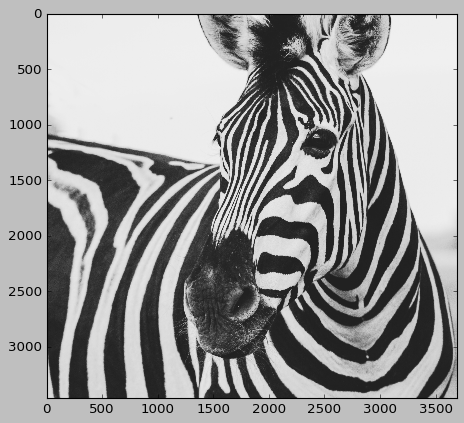

In [2]:

# Usando el estilo clasico
plt.style.use('classic')

# imagen que queremos guardar
imagen = Image.open('../images/imagen_ejemplo_frida_bredesen.jpg')
plt.imshow(imagen)

Nosotros como humanos vemos la zebra, pero te has preguntado ¿Que es lo que ve el computador? Bueno, este ve una o muchas matrices, dependiendo si es a color BN o el indicador de alpha, que recordemos maneja la transparencia.

### Ejemplo

Demostrar que la imagen es en realidad una matriz

In [4]:
# Imagen en escala de grises
imagen_gr = imagen.convert('LA')
print(imagen_gr)

<PIL.Image.Image image mode=LA size=3693x3456 at 0x7F741B743BB0>


Nos muestra que es una imagen de PIL en mode *LA*. SI investigamos un poco mas, podemos darnos cuenta de las dimensiones de esta imagen

In [7]:
print('largo imagen_gr = ', imagen_gr.size[0])
print('ancho imagen_gr = ', imagen_gr.size[1])

largo imagen_gr =  3693
ancho imagen_gr =  3456



A continuacion la vamos a transformar en una matriz, y que lo guarde como *float*.Vemos que el resultado es una tira super grande

In [5]:
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)
print(imagen_mat.shape)

(12763008,)


Observemos cuales son los valores maximos y minimos

In [9]:
print(imagen_mat.min())
print(imagen_mat.max())

25.0
244.0


Redimensionemso el arreglo para que tenga las mismas dimensiones de 3456  x 3693. Esta metrica es en pixeles, y para mi es una barbaridad lo grande que es ese arreglo. Obseva que si se redimensiona al reves, al renderizar la imagen con *matplotlib.pyplot(plt)* la imagen no se renderizara adecuadamente y ya no sera una zebra para un humano

In [6]:
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])
print('despues de redimensionar el arreglo', imagen_mat.shape)

despues de redimensionar el arreglo (3456, 3693)


Ahora, usando *matplotlib* mostraremos la imagen original, con una conversion a escala de grises

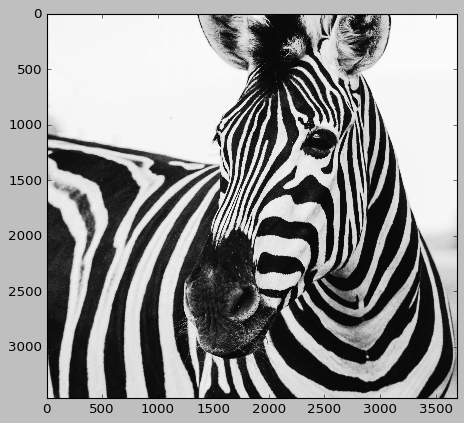

In [7]:
plt.imshow(imagen_mat, cmap='gray')
plt.show()

## Experimento

Dividir la matriz *image_mat* que contine la imagen de la zebra, y dividir todos sus valores entre 10. ¿Podra recuperarse la imagen original?

Hagamolo de dos formas para mostrar un punto muy importante: la primera sin el parametro *cmap* y la otra incluyendolo


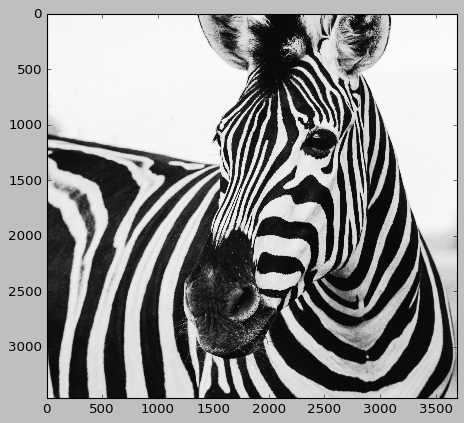

In [12]:
imagen_mat_2 = imagen_mat/10

plt.imshow(imagen_mat_2, cmap='gray')
plt.show()

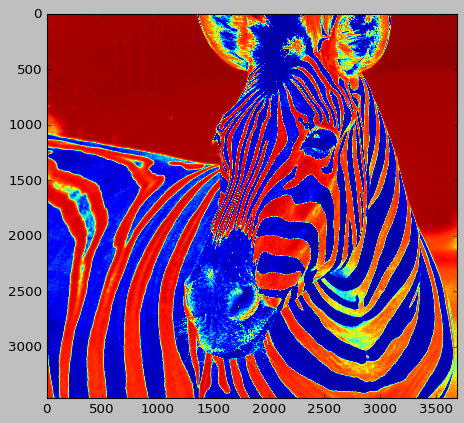

In [13]:
plt.imshow(imagen_mat_2)
plt.show()

#### ¿Que podemos concluir?

Resulta que no es tan importante los valores en si de la matriz, sino la relacion entre cada uno de ellos. Porque al dividr por 10 y aplicando los metodos adecuados recupero la imagen original

En ML por cuestiones de optimizacion y para que los algoritmos propios de ML no tengan problemas de convergencia, es comun normalizarlos, esto implica que los valores de la matriz variaran entre cero y uno.

## Aplicando la descomposicion SVD a una Imagen

¿Es posible aplicar SVD para reducir el tamaño de la imagen sin que deje de ser una zebra?¿Y hasta que punto?

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('classic')
imagen = Image.open('../images/imagen_ejemplo_frida_bredesen.jpg')

In [9]:
imagen_gr = imagen.convert('LA')
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])

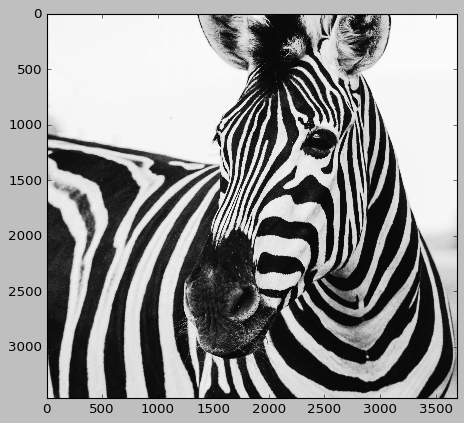

In [10]:
plt.imshow(imagen_mat, cmap='gray')
plt.show()

Hasta aqui hemos hecho lo mismo del modulo anterior: cargar la imagen, guardarla como un arreglo de tipo numpy, redimensionarla y mostrarla.

A continuacion realizaremos la descomposicion SVD, y tardara un poco dependiendo de la computadora, en mi caso tardo casi 1 minuto. Posteriormente analizaremos las dimensiones de las matrices resultantes.

In [11]:
U,D,V = np.linalg.svd(imagen_mat)

In [12]:
print('dimensiones originales:', imagen_mat.shape)
print('tamaño U:', U.shape)
print('tamaño D:', D.shape)
print('tamaño V:', V.shape)

dimensiones originales: (3456, 3693)
tamaño U: (3456, 3456)
tamaño D: (3456,)
tamaño V: (3693, 3693)


Observamos que hay 3456 valores singulares, y que tanto U como V son cuadradas. ¿Pero cual es el punto? En un primer momento reconstruiremos la imagen, usando solo uno de los valores singulares, y observaremos si es posible distinguir la imagen.

note que la imagen reconstruida no usa *np.array* como estabamos aconstumbrados, sino *np.matriz*. 

- np.matrix(U[:, :1]    Todas las filas de U, y desde la columna 0 hasta la 1, es decir solo una columna

- np.diag(D[:1])   Un solo dato

- np.matrix(V[:1,:]     La primera fila, incluyendo todas las columnas


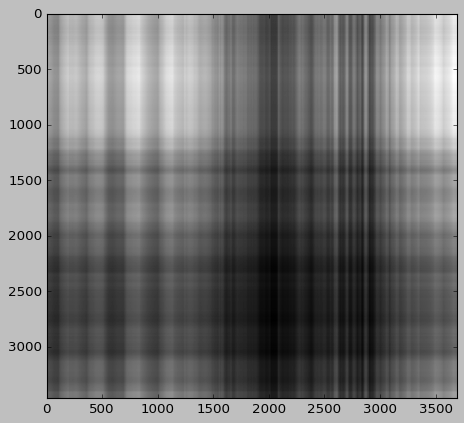

In [13]:
imagen_recons = np.matrix(U[:, :1]) * np.diag(D[:1]) * np.matrix(V[:1,:])
plt.imshow(imagen_recons, cmap='gray')

Es obvio que no. ¿Tal vez si tenemos en cuenta mas valores singulares, podremos reconstruir la imagen para que sea legible?

In [20]:
A = [i for i in range(20) if i%6 != 0]

A = np.array(A)
A = A.reshape(4,4)
print(A)

[[ 1  2  3  4]
 [ 5  7  8  9]
 [10 11 13 14]
 [15 16 17 19]]


In [21]:
np.matrix(A[:, :1])


matrix([[ 1],
        [ 5],
        [10],
        [15]])

In [22]:
print(A[:, :1])


[[ 1]
 [ 5]
 [10]
 [15]]


In [23]:
A[:1]

array([[1, 2, 3, 4]])

In [24]:
np.matrix(A[0,:])

matrix([[1, 2, 3, 4]])

In [25]:
10**2.5

316.22776601683796

## Buscando la Cantidad de Valores Singulares que nos sirvan

Por mi parte voy a usar una escala logaritmica, de una forma distinta a la planteada por el profesor, y ademas voy a crear una funcion.

In [36]:
%run "../Funciones/render_image.ipynb"

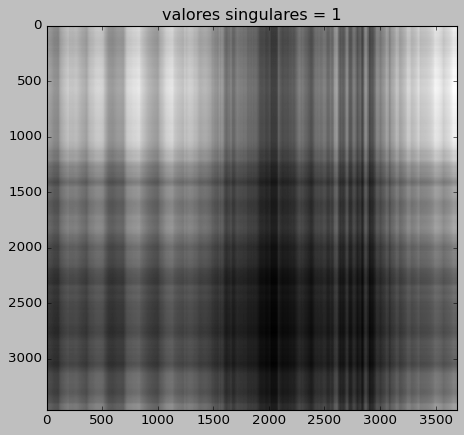

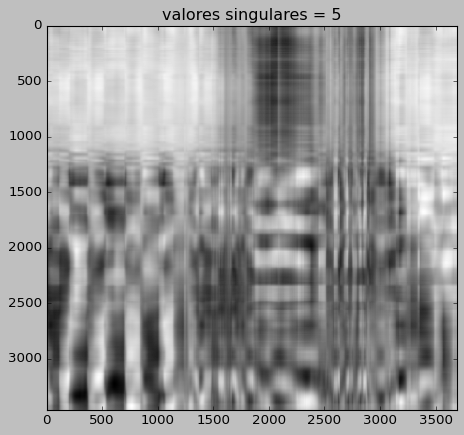

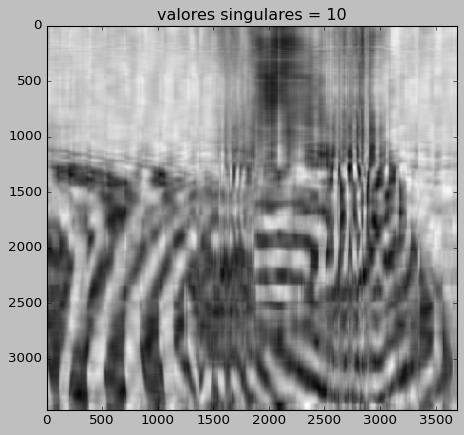

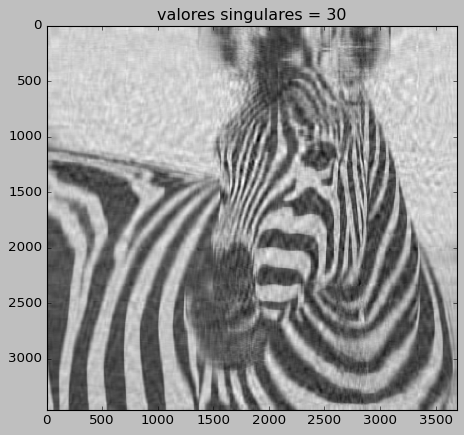

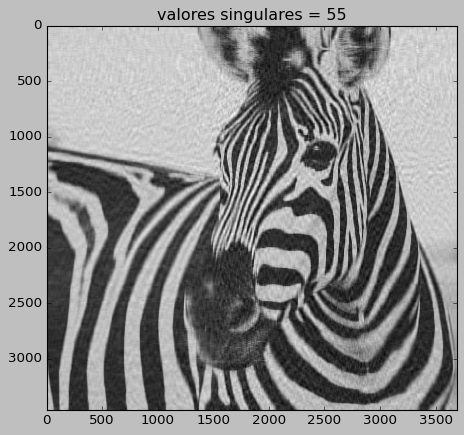

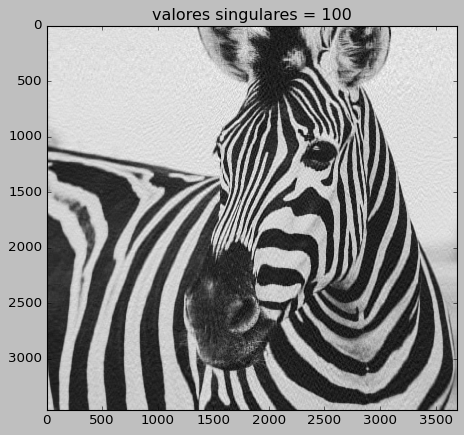

In [35]:
valores_singulares = [1,5,10,30,55,100]

for valor_singular in valores_singulares:
    imagen_recons = render_image(numero_valores_singulares=valor_singular, U=U, D=D, V=V)
    plt.imshow(imagen_recons, cmap='gray')

    title = "valores singulares = %s" %valor_singular
    plt.title(title)
    plt.show()


Con 10 valores singulares se puede distinguir es una Zebra, y ¿Cual es el valor adecuado? dependera para que querriamos nuestra representacion. Si es para que lo identique una computadora, seguramente con 10 valores singulares sera suficiente.

Sin embargo si es para otro tipo de tareas, debemos incrementarlo.

### Conclusion

La imagen original tiene *3456 valores singulares*, y solo con 55 nos damos cuenta que es mas que suficiente para que cualquier persona diga que es una Zebra, entonces permite utilizar menos recursos de memoria y procesamiento. 